In [1]:
# Clonando pasta do github
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/tiagofiorini/MLinPhysics.git
    import os as os
    os.chdir('./MLinPhysics')

Cloning into 'MLinPhysics'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 92 (delta 34), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (92/92), 25.75 MiB | 8.51 MiB/s, done.
Resolving deltas: 100% (34/34), done.


# Exemplos iniciais de particionamento de dados

**Exemplo Amostragem Aleatória**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Exemplo de um conjunto desbalanceado, com 10% de ocorrência da categoria 1
X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
print('y = ',y)

# Divisão aleatória
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('y_test = ',y_test)
print('y_train = ',y_train)

y =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1]
y_test =  [0 0 0 1 0 1 0 0 0 0]
y_train =  [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0]


**Exemplo Amostragem Estratificada**

In [ ]:
# Amostragem estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('y_test = ',y_test)
print('y_train = ',y_train)

y_test =  [0 0 0 0 0 0 0 1 0 0]
y_train =  [0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0]


**Exemplo Divisão k-fold**

In [ ]:
from numpy import array
from sklearn.model_selection import KFold

# Exemplo de um conjunto de dados
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# Configurando a divisão
kf = KFold(n_splits=3, random_state=42, shuffle=True) # suffle: shuffle the data before splitting into folds

# Usa a função split para fazer a divisão e mostra o resultado
for train, test in kf.split(data):
 print('y_train: %s, y_test: %s' % (data[train], data[test]))

y_train: [0.3 0.4 0.5 0.6], y_test: [0.1 0.2]
y_train: [0.1 0.2 0.4 0.5], y_test: [0.3 0.6]
y_train: [0.1 0.2 0.3 0.6], y_test: [0.4 0.5]


# Criando um conjunto de dados

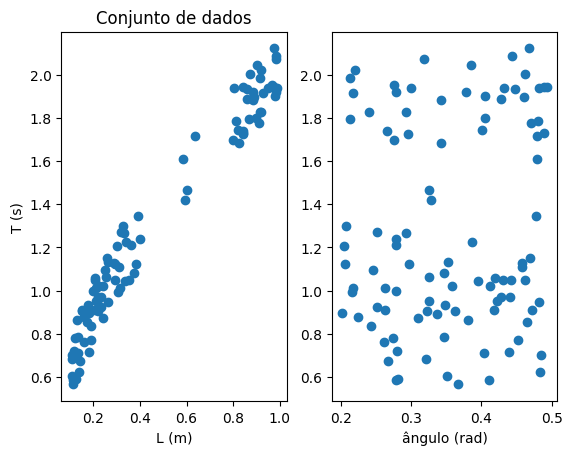

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Criando um conjunto de dados "de brinquedo": período, comprimento e abertura de um pêndulo simples
from numpy import random
rng = np.random.RandomState(15)
L = np.concatenate([rng.uniform(low=0.1, high=0.4, size=(63,1)),
                    rng.uniform(low=0.5, high=0.7, size=(4,1)),
                    rng.uniform(low=0.8, high=1.0, size=(33,1))])
erro = rng.uniform(low=0.0, high=0.3, size=(100,1)) - 0.15
T = 2*np.pi*np.sqrt(L/9.8) + erro # período em seg
ang = rng.uniform(low=0.2, high=0.5, size=(100,1)) # ângulo de abertura em rad (pequenas oscilações)

plt.subplot(1, 2, 1)
plt.scatter(L, T)
plt.xlabel('L (m)')
plt.ylabel('T (s)')
plt.title('Conjunto de dados')
plt.subplot(1, 2, 2)
plt.scatter(ang, T)
plt.xlabel('ângulo (rad)')
plt.show()

# Regressão KNN com amostragem aleatória

Variável alvo: T

Preditor: L

*Exercício: Na célula abaixo, adicione o ângulo de abertura (ang) no array de preditores (X), acrescentando 1 dimensão a mais para o problema. Observe se o desempenho do modelo melhora ou piora.*

Particionamento: amostragem aleatória treino/teste

In [ ]:
# Juntar os dados em um dataframe
df = pd.DataFrame(np.hstack((L, ang, T)), columns=['L', 'ang', 'T'])

# Variáveis preditoras (X) e variável alvo (y)
X = df.drop(['ang', 'T'], axis=1)  # X = df.drop(['T'], axis=1)
y = df.drop(['L', 'ang'], axis=1)

# Divisão aleatória em conjuntos de treino, validação e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=21)

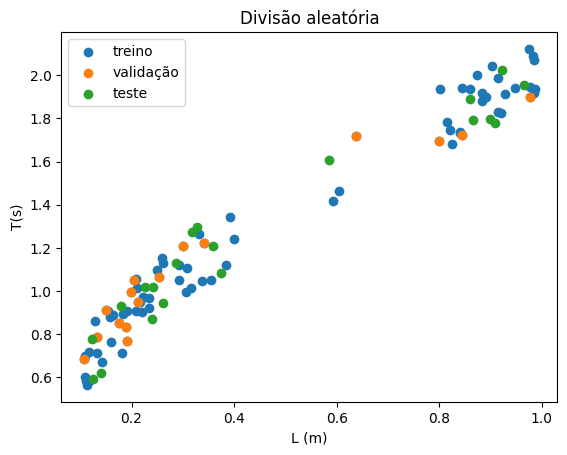

In [ ]:
plt.scatter(X_train['L'], y_train, label = 'treino')
plt.scatter(X_val['L'], y_val, label = 'validação')
plt.scatter(X_test['L'], y_test, label = 'teste')
plt.legend(loc="upper left")
plt.xlabel('L (m)')
plt.ylabel('T(s)')
plt.title('Divisão aleatória')
plt.show()

Aplicando o regressor KNN para obter o período do pêndulo a partir do(s) preditor(es)

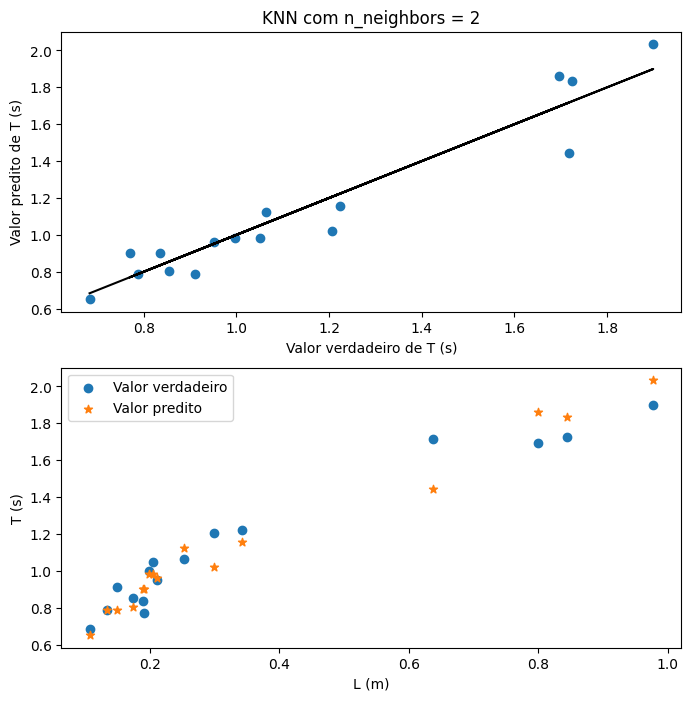

R^2 =  0.9059494315660085
MSE =  0.013751754404807085


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Treinando o algoritmo KNN com k = 2 vizinhos
knn1 = KNeighborsRegressor(n_neighbors = 2)
knn1.fit(X_train, y_train)

# Aplicando o modelo treinado no conjunto de validação
y_pred = knn1.predict(X_val)

# Métricas de desempenho no conjunto de validação
mse = mean_squared_error(y_val,y_pred) # erro quadrático médio
r2 = r2_score(y_val,y_pred) # R^2

plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.scatter(y_val, y_pred)
plt.plot(y_val, y_val, color = 'black', label = 'x=y')
plt.xlabel('Valor verdadeiro de T (s)')
plt.ylabel('Valor predito de T (s)')
plt.title('KNN com n_neighbors = 2')
plt.subplot(2, 1, 2)
plt.scatter(X_val['L'], y_val, label = 'Valor verdadeiro')
plt.scatter(X_val['L'], y_pred, label = 'Valor predito', marker='*')
plt.legend(loc="upper left")
plt.xlabel('L (m)')
plt.ylabel('T (s)')
plt.show()

print('R^2 = ', r2)
print('MSE = ', mse)

Como escolher o melhor número de vizinhos (sintonizar hiperparâmetro)?

k que minimiza MSE:  5


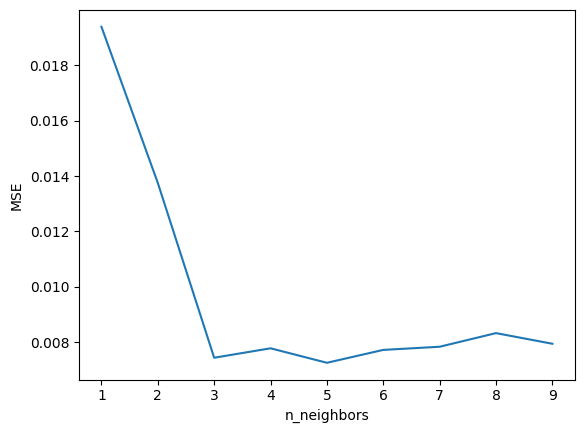

In [ ]:
# Vamos avaliar como o MSE varia com a escolha de n_neighbors

k_list = np.arange(1,10,1) # n_neighbors variando entre 1 e 9
resposta = {} # dict para armazenar n_neighbors e MSE

for i in k_list:
    knn1 = KNeighborsRegressor(n_neighbors = int(i))
    knn1.fit(X_train, y_train) # treino do modelo
    y_pred = knn1.predict(X_val) # aplica o modelo treinado no conjunto de validação
    mse = mean_squared_error(y_val,y_pred)
    resposta[i] = mse

print('k que minimiza MSE: ', min(resposta, key=resposta.get))

plt.plot(resposta.keys(), resposta.values())
plt.xlabel('n_neighbors')
plt.ylabel('MSE')
plt.show()

Aplicando o regressor KNN com n_neighbors otimizado

R^2 =  0.9159208205077237
MSE =  0.016930291007286047


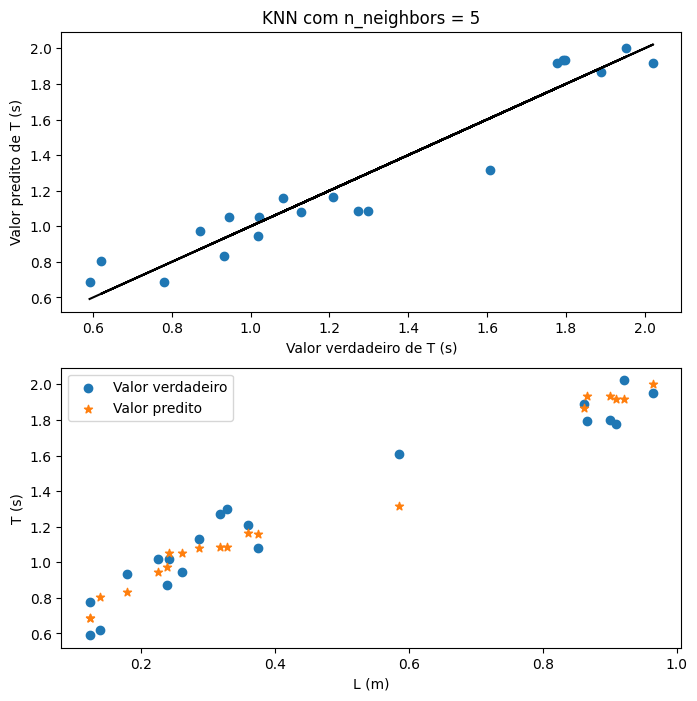

In [ ]:
melhor_n = min(resposta, key=resposta.get) # valor de n_neighbors que minimiza MSE

knn1 = KNeighborsRegressor(n_neighbors = melhor_n)
knn1.fit(X_train, y_train)

# Aplicando o modelo treinado no conjunto de teste
y_pred = knn1.predict(X_test)

# Métricas de desempenho no conjunto de teste
mse = mean_squared_error(y_test,y_pred) # mean squared error
r2 = r2_score(y_test,y_pred) # R^2

print('R^2 = ', r2)
print('MSE = ', mse)

plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color = 'black', label = 'x=y')
plt.xlabel('Valor verdadeiro de T (s)')
plt.ylabel('Valor predito de T (s)')
plt.title('KNN com n_neighbors = ' + str(melhor_n))
plt.subplot(2, 1, 2)
plt.scatter(X_test['L'], y_test, label = 'Valor verdadeiro')
plt.scatter(X_test['L'], y_pred, label = 'Valor predito', marker='*')
plt.legend(loc="upper left")
plt.xlabel('L (m)')
plt.ylabel('T (s)')
plt.show()

*Exercício: o modelo foi criado e otimizado, e está armazenado na variável knn1. O modelo está pronto para ser aplicado em outro conjunto de dados inéditos. Para isso, basta usar a função .predict, por exemplo:*

y_pred_novo = knn1.predict(X_novo)


*Crie um conjunto de dados inéditos para testar a capacidade de generalização do modelo. Use a equação do pêndulo simples para obter os valores verdadeiros de T em função de L. Em especial, verifique o desempenho do modelo para valores de L pouco frequentes no conjunto de treino (0.5<L<0.8).*

# Regressão KNN com validação cruzada k-fold

In [ ]:
# Separa uma parte dos dados para o teste final (X_test_final, y_test_final)

# Variáveis preditoras (X) e variável alvo (y)
X = df.drop(['ang', 'T'], axis=1)
y = df.drop(['L', 'ang'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test_final, y_train, y_test_final = train_test_split(X, y, train_size=0.8, random_state=21)

In [ ]:
from sklearn.model_selection import KFold

# Configurando a divisão
kf = KFold(n_splits=5, shuffle=True, random_state=10)

# Usa a função split para fazer a divisão do conjunto de treino em vários folds
for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
  print(f"Split {i}:")
  print(f'  Train set: {len(train_index)}, Test set:{len(test_index)}')
  print(f"  Test:  index={test_index}")

Split 0:
  Train set: 64, Test set:16
  Test:  index=[ 2  3  6 19 21 26 32 34 35 37 41 43 44 46 65 74]
Split 1:
  Train set: 64, Test set:16
  Test:  index=[ 4  7 14 17 20 38 39 42 47 48 50 58 60 71 72 77]
Split 2:
  Train set: 64, Test set:16
  Test:  index=[10 18 23 24 27 45 52 55 56 66 68 69 70 75 78 79]
Split 3:
  Train set: 64, Test set:16
  Test:  index=[ 1  5 12 13 22 25 30 31 51 53 57 59 61 63 67 76]
Split 4:
  Train set: 64, Test set:16
  Test:  index=[ 0  8  9 11 15 16 28 29 33 36 40 49 54 62 64 73]


In [ ]:
# Aplica a regressão KNN e obtém o valor de uma determinada métrica para cada Split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

score_mse = -cross_val_score(KNeighborsRegressor(n_neighbors = 3), X_train, y_train, cv= kf, scoring="neg_mean_squared_error")
print(f'MSE for each split: {score_mse}')

score_r2 = cross_val_score(KNeighborsRegressor(n_neighbors = 3), X_train, y_train, cv= kf, scoring="r2")
print(f'R^2 for each split: {score_r2}')

MSE for each split: [0.00599891 0.01032363 0.01273917 0.01214148 0.00645268]
R^2 for each split: [0.97207826 0.94696288 0.95686543 0.94904218 0.96671561]


n_neighbors 1:
  MSE in each split: [0.01410939 0.01899969 0.02022139 0.01468978 0.02145939]
n_neighbors 2:
  MSE in each split: [0.00925234 0.01162726 0.01489853 0.01651065 0.01364534]
n_neighbors 3:
  MSE in each split: [0.00788254 0.01271637 0.01350199 0.01095109 0.00963286]
n_neighbors 4:
  MSE in each split: [0.00867312 0.00980384 0.01207069 0.00862971 0.01094581]
n_neighbors 5:
  MSE in each split: [0.00757114 0.01066224 0.0121313  0.0081383  0.009913  ]
n_neighbors 6:
  MSE in each split: [0.00936008 0.01026748 0.01253476 0.00752942 0.01035597]
n_neighbors 7:
  MSE in each split: [0.01079829 0.01052586 0.01264565 0.00775929 0.00937043]
n_neighbors 8:
  MSE in each split: [0.01077589 0.01093959 0.01259873 0.00757375 0.00869766]
n_neighbors 9:
  MSE in each split: [0.00900311 0.01083161 0.01151181 0.00784827 0.00854533]
Valor de k que minimiza MSE:  [9]


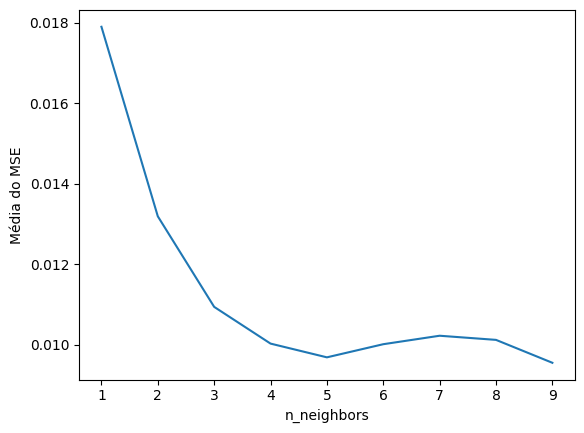

In [ ]:
# Busca pelo melhor valor do hiperparâmetro n_neighbors, com base no MSE

k_list = np.arange(1,10,1) # n_neighbors variando entre 1 e 9
score = np.zeros(shape = (len(k_list),5), dtype=float) # array para armazenar n_neighbors e MSE

for i in k_list:
    score[i-1,:] = -cross_val_score(KNeighborsRegressor(n_neighbors = int(i)), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f"n_neighbors {i}:")
    print(f"  MSE in each split: {score[i-1,:]}")

# Calcula a média dos scores (MSE) em cada split
scoremean = np.mean(score, axis=1)

plt.plot(k_list, scoremean)
plt.xlabel('n_neighbors')
plt.ylabel('Média do MSE')

print('Valor de k que minimiza MSE: ',k_list[np.where(scoremean == min(scoremean))])

R^2 =  0.9434432873496715
MSE =  0.011388331919598208


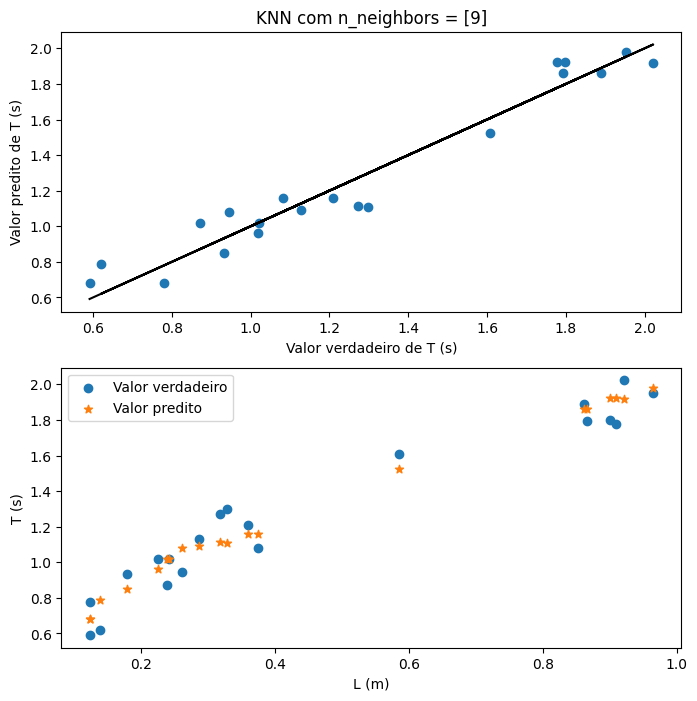

In [ ]:
# Agora que já ajustamos o hiperparâmetro n_neighbors, podemos treinar o modelo
# com todo o conjunto de treino (sem splits), e usar o conjunto de teste final
# para avaliar seu desempenho.
# Com o modelo treinado, ele pode ser usado para fazer predições para valores inéditos.

melhor_n = k_list[np.where(scoremean == min(scoremean))] # valor de n_neighbors que minimiza MSE

knn2 = KNeighborsRegressor(n_neighbors = melhor_n[0])
knn2.fit(X_train, y_train)

# Aplicando o modelo treinado no conjunto de teste
y_pred = knn2.predict(X_test)

# Métricas de desempenho no conjunto de teste
mse = mean_squared_error(y_test,y_pred) # mean squared error
r2 = r2_score(y_test,y_pred) # R^2

print('R^2 = ', r2)
print('MSE = ', mse)

plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color = 'black', label = 'x=y')
plt.xlabel('Valor verdadeiro de T (s)')
plt.ylabel('Valor predito de T (s)')
plt.title('KNN com n_neighbors = ' + str(melhor_n))
plt.subplot(2, 1, 2)
plt.scatter(X_test['L'], y_test, label = 'Valor verdadeiro')
plt.scatter(X_test['L'], y_pred, label = 'Valor predito', marker='*')
plt.legend(loc="upper left")
plt.xlabel('L (m)')
plt.ylabel('T (s)')
plt.show()

*Exercício: o modelo foi criado e otimizado, e está armazenado em knn2. O modelo está pronto para ser aplicado em outro conjunto de dados inéditos. Para isso, basta usar a função .predict, por exemplo:*

y_pred_novo = knn2.predict(X_novo)


*Crie um conjunto de dados inéditos para testar a capacidade de generalização do modelo. Use a equação do pêndulo simples para obter os valores verdadeiros de T em função de L. Em especial, verifique o desempenho do modelo para valores de L pouco frequentes no conjunto de treino (0.4<L<0.8).*